## Part 1 -> Data Pre-processing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Using TensorFlow backend.


### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values

In [5]:
X[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [6]:
y = dataset.iloc[:, 13]

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Encoding categorical data

In [8]:
# for geography column
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [9]:
# for gender column
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [10]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [11]:
transform = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder="passthrough")

In [14]:
X = transform.fit_transform(X).astype(float)

In [15]:
X

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [16]:
X = X[:, 1:]

In [17]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

### Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
X_train.shape

(8000, 11)

In [22]:
y_train.shape

(8000,)

In [23]:
X_test.shape

(2000, 11)

In [24]:
y_test.shape

(2000,)

###  Feature Scaling

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[-0.5698444 ,  1.74309049,  0.16958176, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.9015152 , ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62420521, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28401079, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [27]:
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

## Part 2 -> Building the Artificial Neural Network (ANN)

In [28]:
# Initialising the ANN
classifier = Sequential()

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer="uniform", activation = 'relu', input_dim = 11))

In [30]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer="uniform", activation = 'relu'))

In [31]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [32]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 12s 1ms/step - loss: 0.4792 - accuracy: 0.7960
Epoch 2/100
8000/8000 [==============================] - 12s 2ms/step - loss: 0.4279 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 14s 2ms/step - loss: 0.4222 - accuracy: 0.7983
Epoch 4/100
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4178 - accuracy: 0.8232
Epoch 5/100
8000/8000 [==============================] - 9s 1ms/step - loss: 0.4153 - accuracy: 0.8310
Epoch 6/100
8000/8000 [==============================] - 15s 2ms/step - loss: 0.4138 - accuracy: 0.8309
Epoch 7/100
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4125 - accuracy: 0.8309
Epoch 8/100
8000/8000 [==============================] - 13s 2ms/step - loss: 0.4110 - accuracy: 0.8325
Epoch 9/100
8000/8000 [==============================] - 20s 2ms/step - loss: 0.4099 - accuracy: 0.8347
Epoch 10/100
8000/8000 [==============================] - 24s 3ms

## Part 3 -> Making the predictions and evaluating the model

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array([[0.18101719],
       [0.32444394],
       [0.16066444],
       ...,
       [0.16544524],
       [0.16072899],
       [0.11063281]], dtype=float32)

In [36]:
# better visualization by showing false(0) and true(1) in prediction
# 50% theshold is taken in consideration
y_pred = (y_pred > 0.5)

In [39]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

[[1553   42]
 [ 273  132]]


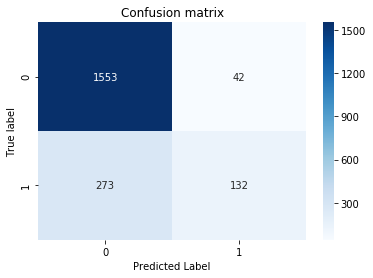

In [41]:
# making the confusion matrix
print(confusion_matrix(y_test, y_pred))
matrix = np.array(confusion_matrix(y_test, y_pred))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted Label')
plt.title('Confusion matrix')
plt.ylim(2, 0)
plt.show()

In [42]:
# the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.76      0.33      0.46       405

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000



####  The accuracy is 84% which is reasonable without doing any parameter tuning.

## Part 4 -> Predicting a single new observation

In [49]:
'''
Predict if the customer with the following informations will leave the bank:
    Geography - France
    Credit Score - 600
    Gender - Male
    Age - 40
    Tenure - 3
    Balance - 60000
    Num of products - 2
    Has Credit card - Yes
    Is active member - Yes
    Estimated Salary - 50000
'''
new_prediction = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

In [50]:
new_prediction

array([[False]])

#### The model predicts that the new customer with the above information will not leave the bank